<a href="https://colab.research.google.com/github/D5Q/prueba_PAE/blob/master/01_pre_poc_pozos_PAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/esppozos.csv')

In [0]:
df.head()

,Fecha,PZ-1005_RIPABC,PZ-1005_RPMWH,PZ-1005_RQFWH,PZ-1006_RIPABC,PZ-1006_RPMWH,PZ-1006_RQFWH,PZ-1142_RIPABC,PZ-1142_RPMWH,PZ-1142_RQFWH,PE-723_RIPABC,PE-723_RPMWH,PE-723_RQFWH,PO-1016_RIPABC,PO-1016_RPMWH,PO-1016_RQFWH,PO-715_RIPABC,PO-715_RPMWH,PO-715_RQFWH,PCD-1001_RIPABC,PCD-1001_RPMWH,PCD-1001_RQFWH,PCD-187_RIPABC,PCD-187_RPMWH,PCD-187_RQFWH,PCD-247_RIPABC,PCD-247_RPMWH,PCD-247_RQFWH,PMC-870_RIPABC,PMC-870_RPMWH,PMC-870_RQFWH,PMC-51_RIPABC,PMC-51_RPMWH,PMC-51_RQFWH,PCP-804_RIPABC,PCP-804_RPMWH,PCP-804_RQFWH,PVH-851_RIPABC,PVH-851_RPMWH,PVH-851_RQFWH,PCG-1079_RIPABC,PCG-1079_RPMWH,PCG-1079_RQFWH,PZ-1418_RIPABC,PZ-1418_RPMWH,PZ-1418_RQFWH
0,2018/01/01 00:10:00,54.032,91.667,0.0,47.060,65.017,-87.393,49.721,80.761,0.0,206.427,68.244,-87.5,47.349,150.200,-87.410,0.0,0.0,0.0,51.866,100.591,-87.002,204.5,194.992,0.0,37.479,103.295,-49.75,50.662,169.656,0.0,47.593,25.643,-87.5,48.136,72.419,-74.502,44.513,83.816,-87.416,28.696,84.976,0.461,176.535,78.991,-74.956
1,2018/01/01 00:20:00,54.065,90.619,0.0,47.035,64.582,-87.393,49.819,80.802,0.0,206.877,68.011,-87.5,47.366,145.226,-87.394,0.0,0.0,0.0,51.782,102.549,-87.002,204.5,195.492,0.0,37.226,103.240,-49.75,50.383,170.726,0.0,47.473,25.185,-87.5,48.225,74.631,-74.502,44.280,82.900,-87.395,28.606,84.679,0.461,177.450,76.764,-74.933
2,2018/01/01 00:30:00,54.098,88.962,0.0,47.002,64.124,-87.393,49.916,78.380,0.0,207.470,67.782,-87.5,47.383,145.592,-87.491,0.0,0.0,0.0,51.689,100.528,-87.002,204.5,195.992,0.0,37.022,105.901,-49.75,50.284,170.962,0.0,47.593,25.628,-87.5,48.320,75.562,-74.502,44.393,81.985,-87.491,28.513,87.914,0.460,176.930,74.016,-74.910
3,2018/01/01 00:40:00,54.211,91.166,0.0,46.968,63.666,-87.393,49.460,77.958,0.0,207.405,68.229,-87.5,47.399,150.551,-87.500,0.0,0.0,0.0,51.773,102.496,-87.002,204.5,195.017,0.0,37.300,104.425,-49.75,50.560,173.305,0.0,47.663,26.085,-87.5,48.235,71.677,-74.502,44.020,83.320,-87.467,28.604,86.221,0.460,176.805,75.776,-74.992
4,2018/01/01 00:50:00,54.106,88.464,0.0,46.935,60.480,-87.393,49.615,79.320,0.0,206.070,68.687,-87.5,47.416,151.085,-87.500,0.0,0.0,0.0,51.589,101.332,-87.002,204.5,194.017,0.0,37.220,102.443,-49.75,50.476,173.944,0.0,47.730,26.543,-87.5,48.054,74.453,-74.502,44.253,82.443,-87.432,28.697,86.797,0.460,175.280,74.678,-74.986


In [0]:
df.describe()

,PZ-1005_RIPABC,PZ-1005_RPMWH,PZ-1005_RQFWH,PZ-1006_RIPABC,PZ-1006_RPMWH,PZ-1006_RQFWH,PZ-1142_RIPABC,PZ-1142_RPMWH,PZ-1142_RQFWH,PE-723_RIPABC,PE-723_RPMWH,PE-723_RQFWH,PO-1016_RIPABC,PO-1016_RPMWH,PO-1016_RQFWH,PO-715_RIPABC,PO-715_RPMWH,PO-715_RQFWH,PCD-1001_RIPABC,PCD-1001_RPMWH,PCD-1001_RQFWH,PCD-187_RIPABC,PCD-187_RPMWH,PCD-187_RQFWH,PCD-247_RIPABC,PCD-247_RPMWH,PCD-247_RQFWH,PMC-870_RIPABC,PMC-870_RPMWH,PMC-870_RQFWH,PMC-51_RIPABC,PMC-51_RPMWH,PMC-51_RQFWH,PCP-804_RIPABC,PCP-804_RPMWH,PCP-804_RQFWH,PVH-851_RIPABC,PVH-851_RPMWH,PVH-851_RQFWH,PCG-1079_RIPABC,PCG-1079_RPMWH,PCG-1079_RQFWH,PZ-1418_RIPABC,PZ-1418_RPMWH,PZ-1418_RQFWH
count,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.0,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.0,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.0,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000,99840.000000
mean,132.855869,96.782134,-30.426055,229.181915,66.364080,-14.299935,51.921263,85.450712,0.0,118.158707,64.917566,-40.194861,44.069699,175.921712,-87.436627,9.730871,13.894392,-18.148876,93.491849,482.334633,152.454936,209.889898,186.742984,0.0,37.801717,104.857943,-49.723445,53.139257,190.539331,0.0,44.753292,29.009416,-87.432709,47.856926,79.799465,-74.466996,39.731476,69.281874,-87.443169,26.251914,81.850392,0.456648,73.065760,29.232718,-84.253385
std,132.498590,251.417012,414.880771,89.613980,12.799175,32.335688,5.426573,19.856671,0.0,74.978326,9.684390,43.603701,11.774211,52.156951,1.877840,18.597318,107.345938,35.349871,91.273591,4969.607664,194.384713,12.573316,17.074223,0.0,1.670997,7.031878,1.067889,3.158483,50.254655,0.0,10.165174,11.053722,1.897799,3.588519,9.269944,1.598795,13.413891,133.955215,1.877649,5.182837,19.108678,0.013457,48.807064,128.926325,5.755344
min,0.000000,-4.308000,-87.500000,0.000000,0.000000,-87.500000,0.000000,-373.598000,0.0,0.000000,-14.223000,-87.500000,0.000000,-374.124000,-87.500000,0.000000,-373.423000,-87.002000,-9873.446000,-15.557000,-87.002000,0.000000,0.000000,0.0,0.000000,-9.049000,-49.751000,0.000000,-9.749000,0.0,0.000000,-9.153000,-87.500000,0.000000,-13.825000,-74.502000,0.000000,-375.000000,-87.500000,0.000000,-9.556000,0.000000,0.000000,-376.222000,-87.500000
25%,38.035000,88.851000,-87.500000,254.000000,64.983000,0.000000,51.189000,80.278000,0.0,50.054000,61.822750,-87.500000,45.698000,178.552000,-87.500000,0.000000,0.000000,0.000000,50.968000,96.712000,-5.011000,206.500000,176.017000,0.0,36.571000,101.601000,-49.751000,52.894000,155.742750,0.0,36.175750,24.277000,-87.500000,47.916000,75.364000,-74.502000,43.530000,89.752000,-87.500000,26.350000,75.420000,0.451000,48.782000,49.386000,-87.500000
50%,193.000000,93.017000,0.000000,260.300000,66.508000,0.000000,52.016000,86.182000,0.0,51.493000,65.925000,0.000000,47.398000,194.572000,-87.500000,0.000000,0.000000,0.000000,52.084000,99.811000,10.000000,210.817000,190.983000,0.0,38.209000,104.463500,-49.750000,53.593000,164.557000,0.0,48.620000,26.055000,-87.500000,48.307000,78.792000,-74.502000,44.007000,98.922000,-87.500000,26.812000,82.780000,0.457000,49.086000,75.302000,-87.500000
75%,210.920000,102.424000,0.000000,270.000000,68.373000,0.000000,53.814000,91.557000,0.0,201.040750,69.734250,0.000000,48.203000,200.584000,-87.461000,0.000000,0.000000,0.000000,65.181750,104.188250,350.000000,213.975000,197.967000,0.0,38.929000,107.632000,-49.750000,54.167000,251.404250,0.0,50.807000,31.886000,-87.448000,48.702000,83.072000,-74.500000,44.673000,124.535000,-87.486000,28.105000,91.010250,0.463000,50.552000,77.407000,-75.000000
max,17057.000000,49664.898000,49600.301000,327.900000,105.967000,0.000000,61.149000,172.507000,0.0,230.565000,115.35

In [0]:
pozos_labels = sorted(list(set([col.split('_')[0] for col in df.columns[1:]])))
signals_labels = sorted(list(set([col.split('_')[1] for col in df.columns[1:]])))

In [0]:
print(pozos_labels)
print(signals_labels)

['PCD-1001', 'PCD-187', 'PCD-247', 'PCG-1079', 'PCP-804', 'PE-723', 'PMC-51', 'PMC-870', 'PO-1016', 'PO-715', 'PVH-851', 'PZ-1005', 'PZ-1006', 'PZ-1142', 'PZ-1418']
['RIPABC', 'RPMWH', 'RQFWH']


In [0]:
from seaborn import distplot

In [0]:
pd.__version__

'0.25.3'

In [0]:
df[pozos_labels[n_pozo]+'_'+signals_labels[2]].sum()

0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


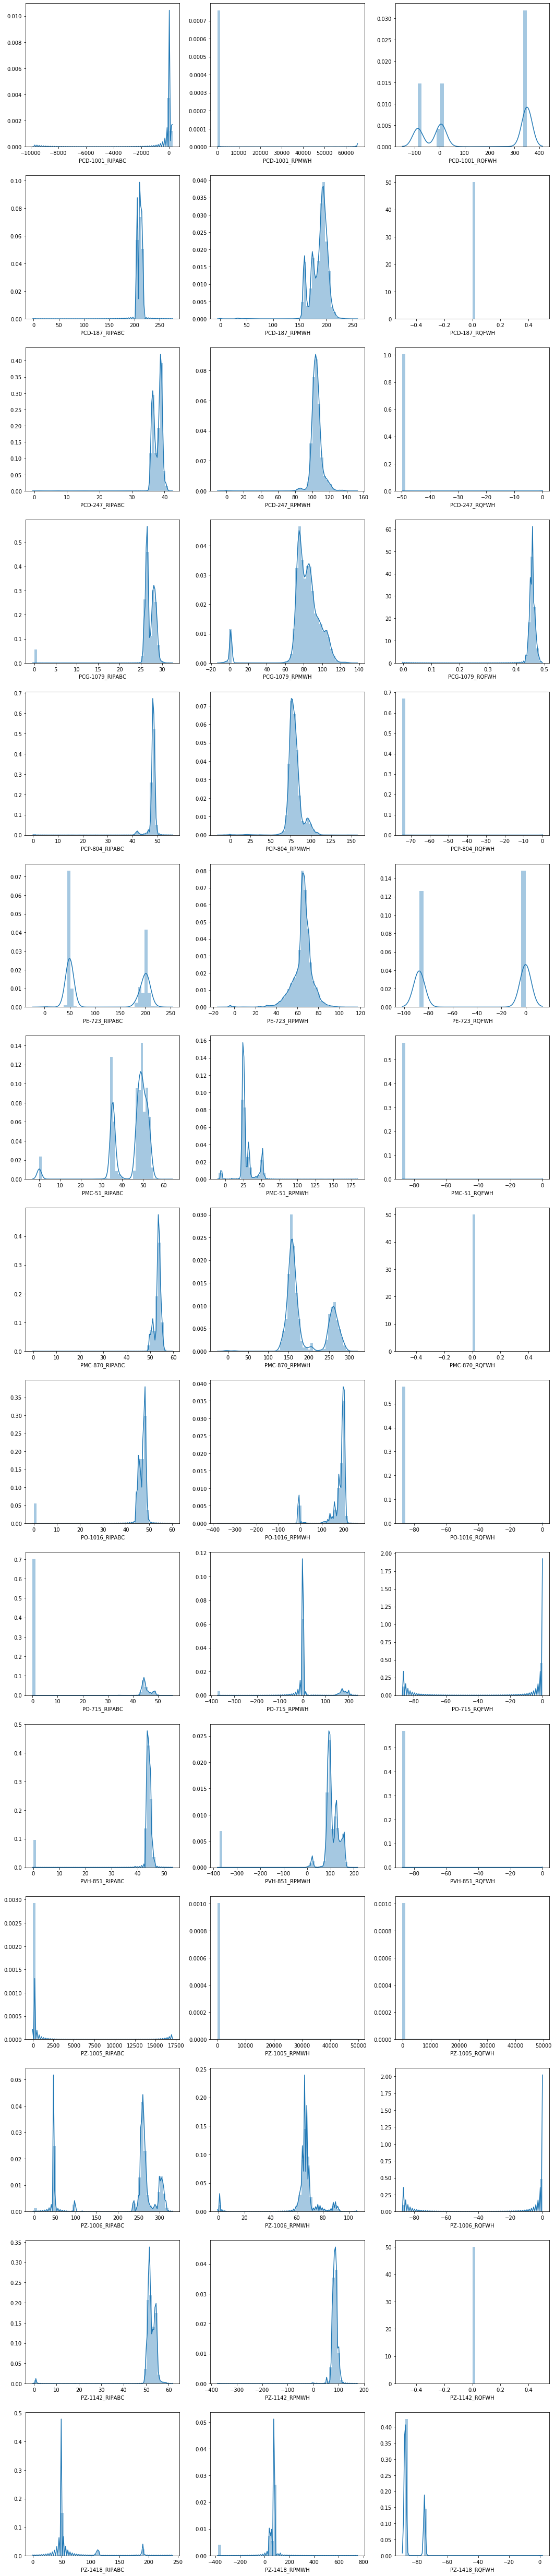

In [0]:
cant_pozos = len(pozos_labels)
cant_signals = len(signals_labels)
f, ax = plt.subplots(cant_pozos, 3, figsize=(18, 6*cant_pozos))
for n_pozo in range(cant_pozos):
  for n_signal in range(cant_signals):
    distplot(df[pozos_labels[n_pozo]+'_'+signals_labels[n_signal]], 
            ax=ax[n_pozo, n_signal])

In [0]:
selected = 3

In [0]:
selected_columns = ['timestamp']
for s in signals_labels:
  selected_columns.append(pozos_labels[3] + '_' + s)
print(selected_columns)

['timestamp', 'PCG-1079_RIPABC', 'PCG-1079_RPMWH', 'PCG-1079_RQFWH']


In [0]:
import datetime

In [0]:
def to_date(x):
  return datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S')

In [0]:
df['date'] = df['Fecha'].apply(to_date)

In [0]:
df['timestamp'] = df['Fecha'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S').timestamp())

In [0]:
df['timestamp'].diff()[1:].var()

0.0

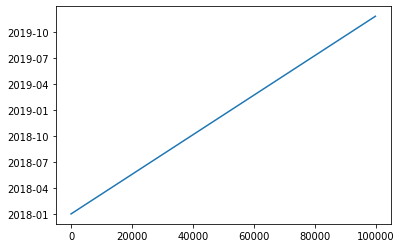

In [0]:
plt.plot(df['timestamp'])

In [0]:
df[selected_columns].head()

,timestamp,PCG-1079_RIPABC,PCG-1079_RPMWH,PCG-1079_RQFWH
0,1.514765e+09,28.696,84.976,0.461
1,1.514766e+09,28.606,84.679,0.461
2,1.514767e+09,28.513,87.914,0.460
3,1.514767e+09,28.604,86.221,0.460
4,1.514768e+09,28.697,86.797,0.460


In [0]:
df[selected_columns].to_csv('/content/drive/My Drive/02_pre_proc_PAE_Pozos.csv')

In [0]:
import numpy as np

In [0]:
error_indexes = df[selected_columns[1]] < 23
new_error_indexes = np.convolve(error_indexes, 
                                np.ones(300), 
                                mode='same') > 0.01

In [0]:
df['error_indexes'] = new_error_indexes
selected_columns.append('error_indexes')

In [0]:
corriente_bomba_falla = df['PCG-1079_RIPABC'][~new_error_indexes][:40000]
corriente_bomba_ok = df['PCG-1079_RIPABC'][~new_error_indexes][55000:]

In [0]:
np.save('/content/drive/My Drive/corriente_bomba_falla.npy', corriente_bomba_falla.values)
np.save('/content/drive/My Drive/corriente_bomba_ok.npy', corriente_bomba_ok.values)

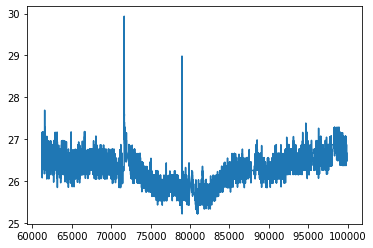

In [0]:
plt.plot(corriente_bomba_ok)

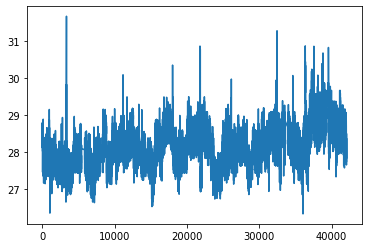

In [0]:
plt.plot(corriente_bomba_falla)

In [0]:
selected_columns[1]

'PCG-1079_RIPABC'

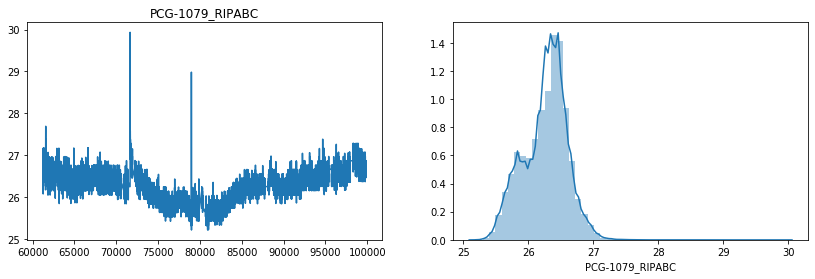

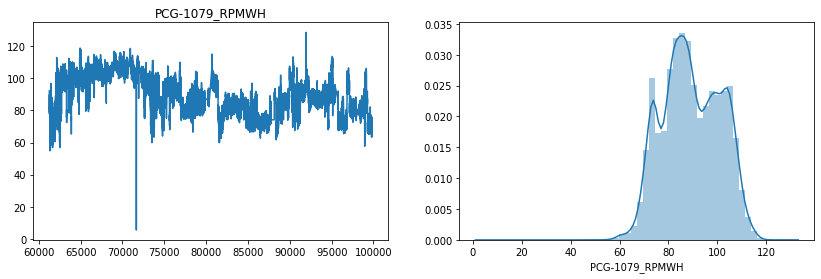

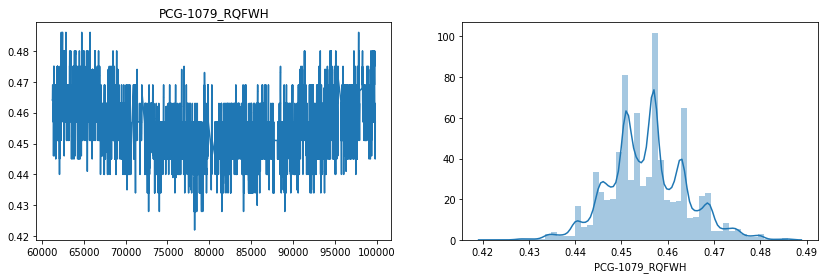

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


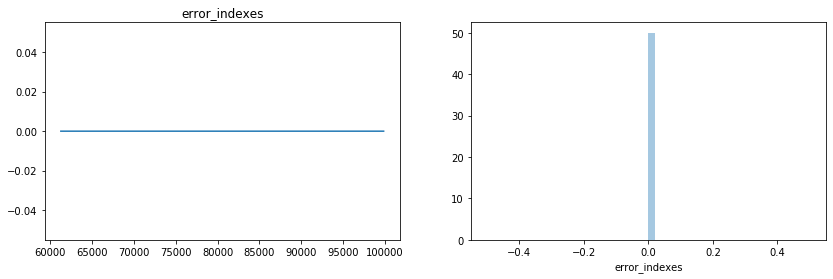

In [0]:
fr = 7800
to = 8200

for i, g in enumerate(selected_columns[1:]):
  f, ax = plt.subplots(1, 2, figsize=(14,4))
  ax[0].set_title(g)
  ax[0].plot( df[g][~new_error_indexes][55000:]) #df['date'][~new_error_indexes],
  distplot(df[g][~new_error_indexes][55000:], ax=ax[1])
  plt.show()

In [0]:
df[selected_columns].to_csv('/content/drive/My Drive/02_pre_proc_PAE_Pozos.csv')

In [0]:
df[selected_columns].head()

,timestamp,PCG-1079_RIPABC,PCG-1079_RPMWH,PCG-1079_RQFWH,error_indexes
0,1.514765e+09,28.696,84.976,0.461,False
1,1.514766e+09,28.606,84.679,0.461,False
2,1.514767e+09,28.513,87.914,0.460,False
3,1.514767e+09,28.604,86.221,0.460,False
4,1.514768e+09,28.697,86.797,0.460,False
